In [ ]:
### import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
### carico i dati
df = pd.read_csv('life_SENZA_NaN.csv')

In [ ]:
### train/test split
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

In [ ]:
target_name ='Life expectancy '
features = ['Adult Mortality', ' HIV/AIDS', 'Income composition of resources']

X_train = train_df[features].copy()
X_test = test_df[features].copy()

y_train = train_df[target_name].copy()
y_test = test_df[target_name].copy()

# CROSS-VALIDATION

Per evitare problemi di overfitting è pratica comune usare un metodo chiamato 'cross-validation'. In pratica, in fase di fitting del modello, invece di fare un solo splitting tra dati di training e dati di test, si divide il dataset in più split e si valutano le performance del modello per ogni split. Scikit-learn integra già delle funzioni di cross-validation in ogni modello.

## K-Fold

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

results = cross_validate(model, X_train, y_train, cv=KFold(n_splits=20), scoring=['r2'], return_train_score=True)

In [ ]:
display(results)

{'fit_time': array([0.29014158, 0.28823423, 0.28382087, 0.28521609, 0.28476119,
        0.27365375, 0.36911154, 0.26781249, 0.2687037 , 0.27832174,
        0.27506137, 0.27255702, 0.28784704, 0.27489257, 0.27767539,
        0.27603102, 0.27625227, 0.26733017, 0.27334499, 0.27953267]),
 'score_time': array([0.01122499, 0.01137638, 0.01120257, 0.01261616, 0.01317978,
        0.01128268, 0.01118279, 0.01159167, 0.01991916, 0.01127887,
        0.01132226, 0.01140761, 0.01146889, 0.01206732, 0.0115602 ,
        0.01157212, 0.01113939, 0.01112843, 0.01108694, 0.01134515]),
 'test_r2': array([0.95487083, 0.91726724, 0.92890265, 0.92131299, 0.9304257 ,
        0.90545103, 0.93538294, 0.97125715, 0.90705718, 0.91844952,
        0.89857973, 0.88703985, 0.96725676, 0.93243513, 0.97514135,
        0.9523135 , 0.93920492, 0.95730584, 0.93325015, 0.94490918]),
 'train_r2': array([0.99138045, 0.99151559, 0.99123379, 0.99114717, 0.99105874,
        0.99161481, 0.99090664, 0.99101325, 0.99160167, 0.991

In [ ]:
### Per trovare il valore finale mi basta fare una media:

train_r2 = np.mean(results['train_r2'])
test_r2 = np.mean(results['test_r2'])
print('Train r2: ', round(train_r2, 3))
print('Test r2: ', round(test_r2, 3))

Train r2:  0.991
Test r2:  0.934


In [ ]:
### Volendo posso anche farmi dare più metriche di scoring dalla cross-validation. Per vedere tutte quelle predefinite basta eseguire questo snippet
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
### con due metriche di scoring
results = cross_validate(model, X_train, y_train, cv=KFold(n_splits=20), scoring=['r2','neg_mean_absolute_error'], return_train_score=True)
display(results)

{'fit_time': array([0.28451967, 0.27920961, 0.28296614, 0.27415824, 0.27738142,
        0.27995157, 0.27351952, 0.27189732, 0.27505565, 0.27759123,
        0.27569079, 0.27370334, 0.2842741 , 0.27812266, 0.27588773,
        0.27365828, 0.27467418, 0.27453804, 0.27666688, 0.26976514]),
 'score_time': array([0.0128212 , 0.01628637, 0.012079  , 0.01373482, 0.01193094,
        0.01149249, 0.01184034, 0.01140594, 0.01555443, 0.01209092,
        0.01205659, 0.01166558, 0.01146841, 0.01174617, 0.01364827,
        0.0114243 , 0.01152396, 0.01161504, 0.01162696, 0.01170897]),
 'test_neg_mean_absolute_error': array([-1.57194308, -1.42293805, -1.94347722, -1.68983019, -1.36308491,
        -1.64113208, -1.50121289, -1.03860769, -1.86661099, -1.48641346,
        -1.79432981, -1.64849519, -1.24761538, -1.43926923, -1.26955032,
        -1.48577244, -1.91584071, -1.08828846, -1.47177724, -1.5540625 ]),
 'test_r2': array([0.95422641, 0.91635536, 0.93088745, 0.91765733, 0.93213323,
        0.90943666, 0

## ShuffleSplit

In [ ]:
### Per cambiare metodo di splitting basta cambiare il parametro cv

from sklearn.model_selection import ShuffleSplit

results = cross_validate(model, X_train, y_train, cv=ShuffleSplit(n_splits=10), scoring=['r2'], return_train_score=True)
train_r2 = np.mean(results['train_r2'])
test_r2 = np.mean(results['test_r2'])
print('Train r2: ', round(train_r2, 3))
print('Test r2: ', round(test_r2, 3))

Train r2:  0.991
Test r2:  0.937


## Model-selection con CV

Riprendendo il tuning di n_estimators...

100%|██████████| 19/19 [00:17<00:00,  1.06it/s]


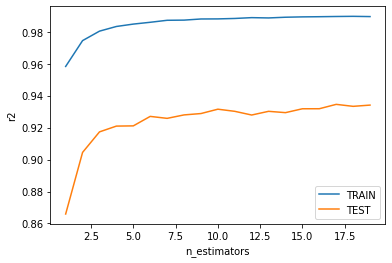

In [ ]:
### TUNING n_estimators
from tqdm import tqdm 

r2_train_list = list()
r2_test_list = list()
n_estimators_range = range(1,20)

for n in tqdm(n_estimators_range):
    model = RandomForestRegressor(n_estimators=n)
    results = cross_validate(model, X_train, y_train, cv=KFold(n_splits=20), scoring=['r2'], return_train_score=True)
    train_r2 = np.mean(results['train_r2'])
    test_r2 = np.mean(results['test_r2'])

    r2_train_list += [train_r2]
    r2_test_list += [test_r2]


plt.plot(n_estimators_range, r2_train_list, label='TRAIN')
plt.plot(n_estimators_range, r2_test_list, label='TEST')
plt.xlabel('n_estimators')
plt.ylabel('r2')
plt.legend()
plt.show()